In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [33]:
def cross_validation(data,current_features,feature_index,mode):
  numCorrect = 0
  if (mode == 1):   #forward selection
    if (feature_index): #add a feature
      features = current_features + [feature_index]
    else:   #don't add a feature
      features = current_features.copy()
  else:   #backward elimination
    features = current_features.copy()
    features.remove(feature_index)

  if (mode != 3):
    print("  Using feature(s)",set(features),end=" ")
  for i in range (0,data.shape[0]): #outer loop - nearest neighbor calculation
    object_to_classify = data[i, features]
    label_object_to_classify = data[i, 0]

    nearest_neighbor_distance = np.inf
    nearest_neighbor_index = np.inf

    for k in range (0,data.shape[0]): #nested loop - nearest neighbor calculation
      if (k != i):
        distance = np.sqrt(sum(np.square(object_to_classify - data[k, features])))
        if (distance < nearest_neighbor_distance):
          nearest_neighbor_distance = distance
          nearest_neighbor_index = k
          nearest_neighbor_label = data[k, 0]
    if (label_object_to_classify == nearest_neighbor_label):
      numCorrect += 1
  accuracy = numCorrect / data.shape[0]
  if (mode != 3):
    print("accuracy is", round(accuracy*100,2),"%")
  return accuracy

In [34]:
def forward_selection(data):
  current_features = []   #start with empty set of features, set()
  accuracy_list = []
  accuracy_levels = []

  start = time.time()

  class_1 = np.sum(data[:,0] == 1) #empty set / default rate calculation for forward selection
  class_2 = np.sum(data[:,0] == 2) # majority class / total instances
  accuracy_list.append(max(class_1, class_2) / data.shape[0])
  accuracy_levels.append(current_features.copy())

  for i in range (1,data.shape[1]):  #column 1 (feature 1) to last column, examine features
      add_this_feature = None;
      max_accuracy = 0

      for k in range (1, data.shape[1]):
        if k in current_features:
          continue
        accuracy = cross_validation(data, current_features, k,1)
        if accuracy > max_accuracy:   #save maximum accuracy of feature subsets per level
          max_accuracy = accuracy
          add_this_feature = k

      if (add_this_feature):  #add the highest feature per level (accuracy may decrease)
        current_features.append(add_this_feature)
        accuracy_list.append(max_accuracy)
        accuracy_levels.append(current_features.copy())
        if (max_accuracy < max(accuracy_list) and len(accuracy_list) > 2):
          print("\nWARNING! Accuracy has decreased, continuing search in case of local maxima.")
        else:
          print("\n")
        print("Feature set", set(current_features), "was best, accuracy is", round(max_accuracy*100,2), "%\n")
      else:
        print("We do not add any feature to the current set \n")

  print("Finished search!! The best feature subset was", set(accuracy_levels[accuracy_list.index(max(accuracy_list))]),"which has an accuracy of", round(max(accuracy_list) * 100,2),"%")
  print("Runtime: ", round((time.time() - start),1)," seconds")
  return accuracy_list, accuracy_levels

In [35]:
def backward_selection(data):
  current_features = [i for i in range(1, data.shape[1])] #start with all features from col 1 to end
  accuracy_list = []
  accuracy_levels = []

  start = time.time()
  for i in range (1,data.shape[1]):
      remove_this_feature = None;
      max_accuracy = 0

      for k in range (1, data.shape[1]): #obtain max accuracy per level
        if k not in current_features:
          continue
        accuracy = cross_validation(data, current_features, k,2)
        if accuracy > max_accuracy:
          max_accuracy = accuracy
          remove_this_feature = k

      if (remove_this_feature): #removing feature from subset(once per outer loop)
        current_features.remove(remove_this_feature)
        accuracy_list.append(max_accuracy)
        accuracy_levels.append(current_features.copy())
        if (max_accuracy < max(accuracy_list)):
          print("\nWARNING! Accuracy has decreased, continuing search in case of local maxima.")
        else:
          print("\n")
        print("Feature set", set(current_features), "was best, accuracy is", round(max_accuracy*100,2), "%\n")
      else:
        print("We do not remove any feature from the current set \n")

  print("Finished search!! The best feature subset was", set(accuracy_levels[accuracy_list.index(max(accuracy_list))]),"which has an accuracy of", round(max(accuracy_list) * 100,2),"%")
  print("Runtime: ", round((time.time() - start),1)," seconds")

  return accuracy_list, accuracy_levels

In [36]:
print("Welcome to Avia Bequette's feature selection algorithm!")
print("Type in the name of the file to test :")
file_name = input()
data = np.loadtxt(file_name, dtype=np.float32)

print("Type the number of the algorithm you want to run.")
print("1) Forward Selection \n2) Backward Elimination")
mode = int(input())

print("\nThis dataset has", data.shape[1]-1 ,"features (not including the class attribute), with", data.shape[0],"instances.\n")    #count features (col) and instances (row)
all_accuracy = round(cross_validation(data,list(i for i in range(0,data.shape[1])),0,3) * 100,2)  #calculate accuracy of simply using all features (no search)
print("Running nearest neighbor with all", data.shape[1]-1, "features, using “leaving-one-out evaluation, I get an accuracy of", all_accuracy,"%")
print("\nBeginning Search.\n")
if (mode == 1):
  accuracy_list, accuracy_levels = forward_selection(data)
elif (mode == 2):
  accuracy_list, accuracy_levels = backward_selection(data)
  accuracy_list.insert(0,all_accuracy/100) #insert (already calculated( accuracy of all features into first position
  accuracy_levels.insert(0,list(i for i in range(1,data.shape[1])))

Welcome to Avia Bequette's feature selection algorithm!
Type in the name of the file to test :
small.txt
Type the number of the algorithm you want to run.
1) Forward Selection 
2) Backward Elimination
1

This dataset has 6 features (not including the class attribute), with 500 instances.

Running nearest neighbor with all 6 features, using “leaving-one-out evaluation, I get an accuracy of 80.6 %

Beginning Search.

  Using feature(s) {1} accuracy is 71.2 %
  Using feature(s) {2} accuracy is 71.6 %
  Using feature(s) {3} accuracy is 74.2 %
  Using feature(s) {4} accuracy is 74.4 %
  Using feature(s) {5} accuracy is 81.8 %
  Using feature(s) {6} accuracy is 74.0 %


Feature set {5} was best, accuracy is 81.8 %

  Using feature(s) {1, 5} accuracy is 83.4 %
  Using feature(s) {2, 5} accuracy is 87.4 %
  Using feature(s) {3, 5} accuracy is 96.0 %
  Using feature(s) {4, 5} accuracy is 82.4 %
  Using feature(s) {5, 6} accuracy is 84.0 %


Feature set {3, 5} was best, accuracy is 96.0 %

  Usi

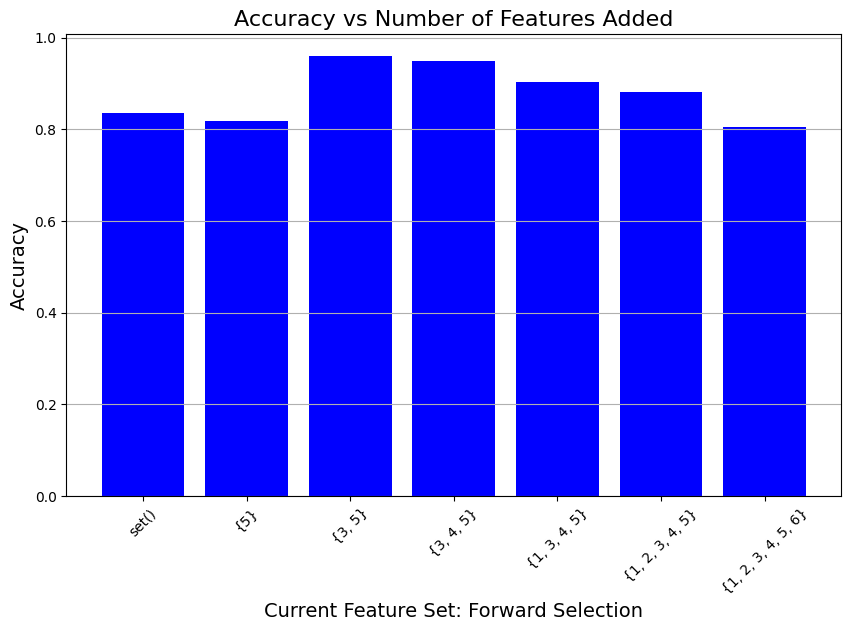

In [37]:
plt.figure(figsize=(10, 6)) #plotting
plt.bar(range(len(accuracy_list)), accuracy_list, color='blue')
if (mode == 1): #forward
  plt.title("Accuracy vs Number of Features Added", fontsize=16)
  plt.xlabel("Current Feature Set: Forward Selection", fontsize=14)
else: #backward
  plt.title("Accuracy vs Number of Features Removed", fontsize=16)
  plt.xlabel("Current Feature Set: Backward Elimination", fontsize=14)

plt.ylabel("Accuracy", fontsize=14)
plt.xticks(range(len(accuracy_list)), labels=list(set(features) for features in accuracy_levels), rotation=45) #x-labels are a list of each subset outlined by accuracy levels
plt.grid(axis='y')
plt.show()